# Tommy John Neural Network

In [200]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [201]:

df_train = pd.read_csv('/Users/timmorales/Desktop/STAT 6341/Tommy John Project/Data/SMOTETRAIN.csv')
df_test = pd.read_csv('/Users/timmorales/Desktop/STAT 6341/Tommy John Project/Data/testset.csv')

df_test = df_test.drop(df_test.columns[0], axis=1)
df_train = df_train.drop(df_train.columns[0], axis=1)

In [202]:
from copy import deepcopy
df_train = deepcopy(df_train)
df_test = deepcopy(df_test)

In [203]:
df_train.head()

,player_age,p_game,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,...,bats_L,bats_R,throws_L,throws_R,throws_S,TJ_Yes,made_postseason_X0,made_postseason_X1,warm_birth_place_X0,warm_birth_place_X1
0,0.449343,0.271899,-0.236873,-0.433236,-0.346471,-0.221791,-0.481580,-0.455052,-0.622586,-0.331504,...,0,1,0,1,0,0,0,1,1,0
1,-0.366322,-1.198887,2.683901,2.403073,2.954865,3.126211,1.774630,0.644949,0.078895,1.192009,...,0,1,0,1,0,0,1,0,1,0
2,-0.366322,-1.151442,1.147790,0.499249,1.177223,1.071755,-0.010346,1.103283,-2.676924,-0.625515,...,0,1,0,1,0,0,1,0,1,0
3,2.624452,-1.056553,1.364144,2.558488,2.555803,2.498461,2.859896,-0.363385,1.565368,-0.090950,...,0,1,0,1,0,0,1,0,0,1
4,1.536897,-0.961663,0.282376,-0.180688,-0.001826,0.025505,-0.453021,0.599116,0.245915,-0.625515,...,1,0,1,0,0,0,1,0,0,1


In [204]:
#setting up my targets 
y_train = df_train['TJ_Yes'].values.astype(np.int)
y_test = df_test['TJ_Yes'].values.astype(np.int)


## Model Work 

With the data succesfully and properly loaded, I bring in keras and tensorflow.

In [205]:
from sklearn import metrics as mt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model

In [206]:
# combine the features into a single large matrix
X_train = df_train.drop(["TJ_Yes"],axis=1).to_numpy()
X_test = df_test.drop(["TJ_Yes"],axis=1).to_numpy()


Input size will always be the same.
I start off with the most basic model possible. 

In [207]:
#id number of features 
num_features = X_train.shape[1]
#set up input
input_tensor = Input(shape=(num_features,))


In [208]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
import tensorflow as tf
from sklearn import metrics as mt

Start out extremely simple with no relu, dropout or penalization to see how it fits. 

In [209]:
model = Sequential()
model.add(Dense(10, input_dim=num_features, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

Im using adam to hopefully find the minima quickly without bouncing around too much and using recall as our metric of choice. 
Binary Cross is a pretty standard use for this case. 50 epochs and small validation set to start.



In [210]:
recall = tf.keras.metrics.Recall()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit([X_train],
                    y_train, 
                    epochs=50, 
                    batch_size=16, 
                    verbose=1, 
                    validation_split = .2)

model.summary()



Epoch 1/50
157/157 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.8401 - val_loss: 1.1647 - val_accuracy: 0.0000e+00
Epoch 2/50
157/157 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.9512 - val_loss: 1.5097 - val_accuracy: 0.0000e+00
Epoch 3/50
157/157 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.9512 - val_loss: 1.8093 - val_accuracy: 0.0000e+00
Epoch 4/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.9512 - val_loss: 2.0613 - val_accuracy: 0.0000e+00
Epoch 5/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9512 - val_loss: 2.2817 - val_accuracy: 0.0000e+00
Epoch 6/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9512 - val_loss: 2.4593 - val_accuracy: 0.0000e+00
Epoch 7/50
157/157 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.9512 - val_loss: 2.5880 - val

In [211]:
# now lets see how well the model performed
yhat_proba = model.predict(X_test)
yhat = np.where(yhat_proba > 0.5, 1, 0)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))



[[1042   22]
 [  28    1]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1064
           1       0.04      0.03      0.04        29

    accuracy                           0.95      1093
   macro avg       0.51      0.51      0.51      1093
weighted avg       0.95      0.95      0.95      1093



Text(0.5, 0, 'epochs')

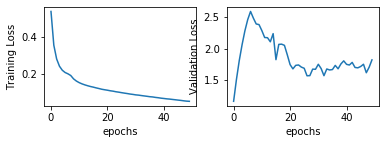

In [212]:
plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.ylabel('Validation Loss')
plt.xlabel('epochs')

Model doesnt seem to converge fully, will add more epochs, but looks like we may be starting to overfit. 

In [213]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit([X_train],
                    y_train, 
                    epochs=25, 
                    batch_size=16, 
                    verbose=0, 
                    validation_split = .2)

model.summary()


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 10)                3370      
_________________________________________________________________
dense_106 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 6         
Total params: 3,431
Trainable params: 3,431
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

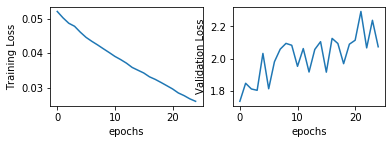

In [214]:
plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.ylabel('Validation Loss')
plt.xlabel('epochs')

Looks like adding the 25 actually resulted in some overfitting when comparing validation and training loss. 
We therefore will fit for 70 total epochs, but include some drop out. I also include some regularization on the hidden layer to aid in the overfitting. 

Since I see no issue with the model training I dont change activiation function. 

In [215]:
model = Sequential()
model.add(Dense(10, input_dim=num_features, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [216]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit([X_train],
                    y_train, 
                    epochs=70, 
                    batch_size=16, 
                    verbose=1, 
                    validation_split = .2)

model.summary()



Epoch 1/70
157/157 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.9464 - val_loss: 2.1051 - val_accuracy: 0.0000e+00
Epoch 2/70
157/157 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.9508 - val_loss: 2.5909 - val_accuracy: 0.0000e+00
Epoch 3/70
157/157 [==============================] - 0s 1ms/step - loss: 0.2008 - accuracy: 0.9512 - val_loss: 2.6669 - val_accuracy: 0.0000e+00
Epoch 4/70
157/157 [==============================] - 0s 1ms/step - loss: 0.1891 - accuracy: 0.9512 - val_loss: 2.6470 - val_accuracy: 0.0000e+00
Epoch 5/70
157/157 [==============================] - 0s 1ms/step - loss: 0.1734 - accuracy: 0.9512 - val_loss: 2.5104 - val_accuracy: 0.0000e+00
Epoch 6/70
157/157 [==============================] - 0s 1ms/step - loss: 0.1676 - accuracy: 0.9512 - val_loss: 2.5101 - val_accuracy: 0.0000e+00
Epoch 7/70
157/157 [==============================] - 0s 1ms/step - loss: 0.1613 - accuracy: 0.9512 - val_loss: 2.3670 - val

Text(0.5, 0, 'epochs')

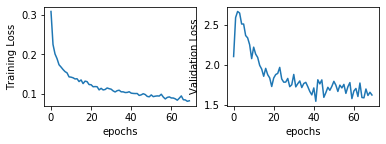

In [217]:

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.ylabel('Validation Loss')
plt.xlabel('epochs')

In [218]:
# now lets see how well the model performed
yhat_proba = model.predict(X_test)
yhat = np.where(yhat_proba > 0.5, 1, 0)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))


[[1041   23]
 [  28    1]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1064
           1       0.04      0.03      0.04        29

    accuracy                           0.95      1093
   macro avg       0.51      0.51      0.51      1093
weighted avg       0.95      0.95      0.95      1093



No improvement in the results. Since it did not seem to be training very well after a few epochs, I will use relu instead of sigmoid to address gradient issue potentially. 

In [219]:
model = Sequential()
model.add(Dense(10, input_dim=num_features, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu'))



In [220]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit([X_train],
                    y_train, 
                    epochs=70, 
                    batch_size=16, 
                    verbose=1, 
                    validation_split = .2)

model.summary()

Epoch 1/70
157/157 [==============================] - 0s 2ms/step - loss: 0.7605 - accuracy: 0.9504 - val_loss: 15.4255 - val_accuracy: 0.0000e+00
Epoch 2/70
157/157 [==============================] - 0s 1ms/step - loss: 0.7527 - accuracy: 0.9512 - val_loss: 15.4254 - val_accuracy: 0.0000e+00
Epoch 3/70
157/157 [==============================] - 0s 1ms/step - loss: 0.7531 - accuracy: 0.9508 - val_loss: 15.4253 - val_accuracy: 0.0000e+00
Epoch 4/70
157/157 [==============================] - 0s 1ms/step - loss: 0.7525 - accuracy: 0.9512 - val_loss: 15.4253 - val_accuracy: 0.0000e+00
Epoch 5/70
157/157 [==============================] - 0s 1ms/step - loss: 0.7526 - accuracy: 0.9512 - val_loss: 15.4252 - val_accuracy: 0.0000e+00
Epoch 6/70
157/157 [==============================] - 0s 1ms/step - loss: 0.7524 - accuracy: 0.9512 - val_loss: 15.4252 - val_accuracy: 0.0000e+00
Epoch 7/70
157/157 [==============================] - 0s 1ms/step - loss: 0.7524 - accuracy: 0.9512 - val_loss: 15.425

Text(0.5, 0, 'epochs')

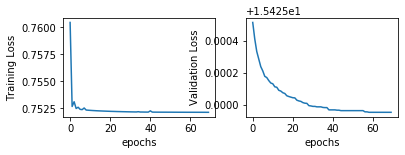

In [221]:
%matplotlib inline

# plt.figure(figsize=(10,4))
# plt.subplot(2,2,1)
# plt.plot(history.history['recall'])

# plt.ylabel('Accuracy %')
# plt.title('Training')
# plt.subplot(2,2,2)
# plt.plot(history.history['val_accuracy'])
# plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.ylabel('Validation Loss')
plt.xlabel('epochs')

Looks to be overfitting again, but now at around 40 epochs. The relu has helped to train much faster. 

In [222]:
model = Sequential()
model.add(Dense(10, input_dim=num_features, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit([X_train],
                    y_train, 
                    epochs=40, 
                    batch_size=16, 
                    verbose=1, 
                    validation_split = .2)

model.summary()

Epoch 1/40
157/157 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.9452 - val_loss: 14.1004 - val_accuracy: 0.0000e+00
Epoch 2/40
157/157 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.9552 - val_loss: 13.1706 - val_accuracy: 0.0016
Epoch 3/40
157/157 [==============================] - 0s 1ms/step - loss: 0.5847 - accuracy: 0.9588 - val_loss: 11.8667 - val_accuracy: 0.0304
Epoch 4/40
157/157 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.9616 - val_loss: 13.0796 - val_accuracy: 0.0048
Epoch 5/40
157/157 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.9636 - val_loss: 13.2361 - val_accuracy: 0.0064
Epoch 6/40
157/157 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.9628 - val_loss: 13.2077 - val_accuracy: 0.0096
Epoch 7/40
157/157 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.9656 - val_loss: 12.2625 - val_accuracy: 0.

Text(0.5, 0, 'epochs')

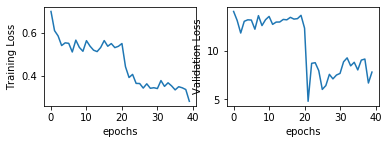

In [223]:

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.ylabel('Validation Loss')
plt.xlabel('epochs')

In [224]:
# now lets see how well the model performed
yhat_proba = model.predict(X_test)
yhat = np.where(yhat_proba > 0.5, 1, 0)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))


[[1061    3]
 [  28    1]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1064
           1       0.25      0.03      0.06        29

    accuracy                           0.97      1093
   macro avg       0.61      0.52      0.52      1093
weighted avg       0.96      0.97      0.96      1093



It does look like the model really struggles to find the global minima and that is to be expected with small data. Last thing I will try is to increase the batch size. I keep in scale of 2. 

In [225]:
model = Sequential()
model.add(Dense(10, input_dim=num_features, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit([X_train],
                    y_train, 
                    epochs=40, 
                    batch_size=24, 
                    verbose=1, 
                    validation_split = .2)

model.summary()

Epoch 1/40
105/105 [==============================] - 0s 2ms/step - loss: 0.7482 - accuracy: 0.9496 - val_loss: 15.4039 - val_accuracy: 0.0000e+00
Epoch 2/40
105/105 [==============================] - 0s 1ms/step - loss: 0.7608 - accuracy: 0.9504 - val_loss: 15.4059 - val_accuracy: 0.0000e+00
Epoch 3/40
105/105 [==============================] - 0s 1ms/step - loss: 0.7443 - accuracy: 0.9508 - val_loss: 15.4258 - val_accuracy: 0.0000e+00
Epoch 4/40
105/105 [==============================] - 0s 1ms/step - loss: 0.7442 - accuracy: 0.9512 - val_loss: 15.4258 - val_accuracy: 0.0000e+00
Epoch 5/40
105/105 [==============================] - 0s 1ms/step - loss: 0.7440 - accuracy: 0.9512 - val_loss: 15.4258 - val_accuracy: 0.0000e+00
Epoch 6/40
105/105 [==============================] - 0s 1ms/step - loss: 0.7277 - accuracy: 0.9508 - val_loss: 15.4258 - val_accuracy: 0.0000e+00
Epoch 7/40
105/105 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.9512 - val_loss: 15.425

Text(0.5, 0, 'epochs')

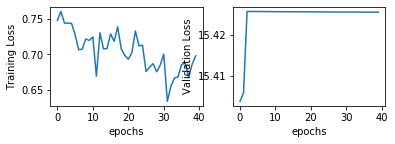

In [226]:
plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.ylabel('Validation Loss')
plt.xlabel('epochs')

In [227]:

# now lets see how well the model performed
yhat_proba = model.predict(X_test)
yhat = np.where(yhat_proba > 0.5, 1, 0)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))


[[1064    0]
 [  29    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1064
           1       0.00      0.00      0.00        29

    accuracy                           0.97      1093
   macro avg       0.49      0.50      0.49      1093
weighted avg       0.95      0.97      0.96      1093



The model just predicts 0 for the entire dataset with larger batch size. 

# Conclusion 
There does not seem to be anything really here in the data. It is tough to avoid phacking by continuing on and modifying and I do not really see any noticable improvement on a random guess. More data would most likely be helpful. 